## install cellpose and import libraries

In [1]:
import cv2
cv2.__version__

'4.8.1'

In [2]:
#!pip install cellpose

import glob
import numpy as np
import pandas as pd
import time, os, sys
from urllib.parse import urlparse
import skimage.io
import skimage
import cellpose
import imagecodecs
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300

from urllib.parse import urlparse
from cellpose import models, core

use_GPU = core.use_gpu()
print('>>> GPU activated? %d'%use_GPU)

# call logger_setup to have output of cellpose written
from cellpose.io import logger_setup
import os
from os import listdir
from os.path import isfile, join
from skimage import measure
import matplotlib.pyplot as plt
logger_setup();

import math

>>> GPU activated? 0
2023-12-08 01:10:56,649 [INFO] WRITING LOG OUTPUT TO /Users/mem3579/.cellpose/run.log
2023-12-08 01:10:56,650 [INFO] 
cellpose version: 	2.2.3 
platform:       	darwin 
python version: 	3.9.6 
torch version:  	2.1.1


## data import

In [3]:
### Specify input and output directories

dataPath = "/Volumes/fsmresfiles/Basic_Sciences/CDB/CDB_Collaborations/Arispe_Goyal/MadelineMelzer/DATA/nucleiDysmorphia/data/age/20231206/unsegmented/"
savePath = "/Volumes/fsmresfiles/Basic_Sciences/CDB/CDB_Collaborations/Arispe_Goyal/MadelineMelzer/DATA/nucleiDysmorphia/data/age/20231206/segmented/"
segmentation_model = "/Volumes/fsmresfiles/Basic_Sciences/CDB/CDB_Collaborations/Arispe_Goyal/MadelineMelzer/DATA/nucleiDysmorphia/data/segmentationModels/CP_20230116_weirdNuclei_05"

#resultsPath = "/Volumes/fsmresfiles/Basic_Sciences/CDB/CDB_Collaborations/Arispe_Goyal/MadelineMelzer/DATA/nucleiDysmorphia/data/controls/elliptical/results/"
os.chdir(dataPath)

In [4]:
#read in all image file names from the folder
files = [f for f in listdir(dataPath) if isfile(join(dataPath, f)) if ".DS_Store" not in f if ".tif" in f]
files = sorted(files)
nimg = len(files)

nimg

32

Reading in samples

32


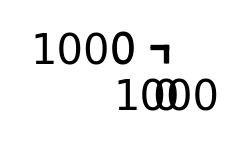

In [5]:
### Reading in the samples

imgs = [skimage.io.imread(f) for f in files]
##plot num for number of images
plot_number = 1
nimg = len(imgs)
print(nimg)
if nimg < plot_number:
    plot_number = nimg
plt.figure(figsize=(1,1))
for k,img in enumerate(imgs[:plot_number]):
    plt.subplot(110,plot_number,k+1)
    plt.imshow(img)

run custom model

In [13]:
# saving segmented masks for troubleshooting

from os import listdir, makedirs
from os.path import isfile, join, exists
import matplotlib.pyplot as plt
import skimage.io

savePath = "/Volumes/fsmresfiles/Basic_Sciences/CDB/CDB_Collaborations/Arispe_Goyal/MadelineMelzer/DATA/nucleiDysmorphia/data/age/nucleiSegmented/"

outputDirectory = "/Volumes/fsmresfiles/Basic_Sciences/CDB/CDB_Collaborations/Arispe_Goyal/MadelineMelzer/DATA/nucleiDysmorphia/data/age/plots/masks/"

files = [f for f in listdir(savePath) if isfile(join(savePath, f)) and ".DS_Store" not in f and ".tif" in f]
files = sorted(files)

imgs = [skimage.io.imread(join(savePath, f)) for f in files]

for img, filename in zip(imgs, files):
    fig, ax = plt.subplots(figsize=(10,10))

    ax.imshow(img, aspect='auto')   # set aspect to 'auto'
    #ax.set_title(filename)
    ax.axis('off')

    # Remove white spaces/margins
    plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
    plt.margins(0,0)
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    outputPath = join(outputDirectory, filename)
    plt.savefig(outputPath, format='tif', dpi=100, bbox_inches='tight', pad_inches=0)
    plt.close()  # Close the plot to free memory


In [6]:
###Here your input is needed!!###

from cellpose import models

# DEFINE CELLPOSE MODEL
# model_type='cyto', 'cyto2' or model_type='nuclei'

model = models.CellposeModel(gpu=True,
                             pretrained_model= segmentation_model)

# define CHANNELS to run segementation on
# grayscale=0, R=1, G=2, B=3
# channels = [cytoplasm, nucleus]
# if NUCLEUS channel does not exist, set the second channel to 0 -> channels = [0,0]

# channels = [0,0] # IF YOU HAVE GRAYSCALE
# channels = [2,3] # IF YOU HAVE Green=cytoplasm and Blue=nucleus
# channels = [2,1] # IF YOU HAVE Green=cytoplasm and Red=nucleus

channels = [0,0]

# if diameter is set to None, the size of the cells is estimated on a per image basis
# you can set the average cell `diameter` in pixels yourself (recommended)
# diameter can be a list or a single number for all images

diameterParam = model.diam_labels

# flow threshold: Sometimes the neural network identifies cell shapes, which are in reality no cell shape.
# default is 0.4
# If you have too many masks in the image because the image is too noisy, decrease this parameter slightly.
# Increase this parameter if cellpose is not returning as many region of interest as you’d expect. (For example different cell sizes)

flowThreshold = 0.4

#cellprob_threshold: Each shape gets a probability of being a cell
#Decrease this threshold if cellpose is not returning as many ROIs as you’d expect.
#Similarly, increase this threshold if cellpose is returning too ROIs particularly from dim areas.

cellprobThreshold = 0.0

#model = models.CellposeModel(gpu=use_GPU, model_type=modelType)
masks, flows, styles = model.eval(imgs, diameter=diameterParam, flow_threshold=flowThreshold, channels=channels, cellprob_threshold=cellprobThreshold)

2023-12-08 01:21:16,267 [INFO] >>>> loading model /Volumes/fsmresfiles/Basic_Sciences/CDB/CDB_Collaborations/Arispe_Goyal/MadelineMelzer/DATA/nucleiDysmorphia/data/segmentationModels/CP_20230116_weirdNuclei_05
2023-12-08 01:21:16,281 [INFO] TORCH CUDA version not installed/working.
2023-12-08 01:21:16,281 [INFO] >>>> using CPU
2023-12-08 01:21:16,282 [INFO] WARNING: MKL version on torch not working/installed - CPU version will be slightly slower.


2023-12-08 01:21:16,282 [INFO] see https://pytorch.org/docs/stable/backends.html?highlight=mkl
2023-12-08 01:21:17,352 [INFO] >>>> model diam_mean =  17.000 (ROIs rescaled to this size during training)
2023-12-08 01:21:17,352 [INFO] >>>> model diam_labels =  109.242 (mean diameter of training ROIs)
2023-12-08 01:24:34,868 [INFO] 100%|##########| 32/32 [03:17<00:00,  6.17s/it]


In [28]:
model

In [7]:
## save output to *_seg.npy
from cellpose import io
os.chdir(savePath)
'''io.masks_flows_to_seg(imgs,
                      masks,
                      flows,
                      diameterParam*np.ones(len(masks)),
                      files,
                      [0, 0])'''

io.save_masks(imgs,
              masks,
              flows,
              files,
              channels=[0, 0],
              #png=True, # save masks as PNGs and save example image
              tif=True, # save masks as TIFFs
              #save_txt=False, # save txt outlines for ImageJ
              #save_flows=False, # save flows as TIFFs
              #save_outlines=True, # save outlines as TIFFs
              )

creating a data frame with all of the .npy file paths in it

In [9]:
import os
from PIL import Image
import matplotlib.pyplot as plt

def plot_images_with_filenames(directory):
    # List all files in the directory
    files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]

    # Filter only image files using a simple extension-based check (you can improve this filter)
    img_files = [f for f in files if f.lower().endswith('.tif')]

    # Set up the figure and axes
    fig, axes = plt.subplots(nrows=1, ncols=len(img_files), figsize=(15, 5))

    for ax, img_file in zip(axes, img_files):
        img_path = os.path.join(directory, img_file)
        img = Image.open(img_path)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(img_file)

    plt.tight_layout()
    plt.show()

In [ ]:
#processing images, copied from nucleiDysmorphia_CAJAL_v1.ipynb, can use the
# note 20231026: no idea what this was for. maybe in notebook.

import tifffile as tif
import shutil

def process_all_images(filtered_nuclei, input_dir, output_dir):
    # List all .tif files in the input directory
    all_files = [f for f in os.listdir(input_dir) if f.endswith('.tif')]

    for filename in all_files:
        input_image_path = os.path.join(input_dir, filename)
        output_image_path = os.path.join(output_dir, filename)

        # Extracting basenames from the full paths in the dataframe for comparison
        unique_files_in_df = [os.path.basename(f) for f in filtered_nuclei['file'].unique()]

        # If the image has nuclei that need to be removed
        if filename in unique_files_in_df:
            # Load the corresponding .tif image
            image = tif.imread(input_image_path)

            # Filter labels based on the filename
            labels_to_remove = filtered_nuclei[filtered_nuclei['file'].str.endswith(filename)]['label']

            # For each label associated with the file in the filtered_nuclei dataframe
            for label_value in labels_to_remove:
                image[image == label_value] = 0

            # Save the modified image to the output directory
            tif.imwrite(output_image_path, image)
        else:
            # If the image does not have any nuclei to be removed, simply copy it to the outputDir
            shutil.copy(input_image_path, output_image_path)

In [8]:
# function to identify nuclei on the periphery
import os
import numpy as np
from tifffile import imread, imwrite
import shutil

def remove_peripherals(input_dir, output_dir):
    # List all .tif files in the input directory
    all_files = [f for f in os.listdir(input_dir) if f.endswith('.tif')]

    for filename in all_files:
        input_image_path = os.path.join(input_dir, filename)
        output_image_path = os.path.join(output_dir, filename)

        # Load the image
        image = imread(input_image_path)

        # Identify the unique labels (or nuclear masks) in the image, excluding the background
        labels = np.unique(image)[1:]

        # Check the boundaries
        boundaries = [
            image[0, :],           # Top row
            image[:, 0],           # Leftmost column
            image[-1, :],          # Bottom row
            image[:, -1],          # Rightmost column
        ]

        # List to store labels that touch the boundary
        labels_to_remove = []

        for label in labels:
            for boundary in boundaries:
                if label in boundary:
                    labels_to_remove.append(label)
                    break

        # For each label that touches the boundary, set its value to 0
        for label_value in labels_to_remove:
            image[image == label_value] = 0

        # Save the modified image to the output directory
        imwrite(output_image_path, image)


In [9]:
### getting rid of nuclei cutoff by the periphery of the image

import tifffile as tif

#inputDir = "/Volumes/fsmresfiles/Basic_Sciences/CDB/CDB_Collaborations/Arispe_Goyal/MadelineMelzer/DATA/nucleiDysmorphia/data/age/nucleiSegmented_52wkMale2/"
qcPath = "/Volumes/fsmresfiles/Basic_Sciences/CDB/CDB_Collaborations/Arispe_Goyal/MadelineMelzer/DATA/nucleiDysmorphia/data/age/20231206/segmented/filteredPeriphery/"

remove_peripherals(savePath, qcPath)

In [10]:
### making images of individual segmented cells
import os
from PIL import Image

folder_path = "/Volumes/fsmresfiles/Basic_Sciences/CDB/CDB_Collaborations/Arispe_Goyal/MadelineMelzer/DATA/nucleiDysmorphia/data/age/20231206/segmented/filteredPeriphery/"
save_path = "/Volumes/fsmresfiles/Basic_Sciences/CDB/CDB_Collaborations/Arispe_Goyal/MadelineMelzer/DATA/nucleiDysmorphia/data/age/nucleiSegmented/individuals/"

for filename in os.listdir(folder_path):
    if filename.endswith(".tif"):
        full_path = os.path.join(folder_path, filename)
        image = Image.open(full_path)

        # Iterate over the segmented cells in the image
        for cell_number in set(image.getdata()):
            if cell_number != 0:  # Exclude the background pixels labeled as 0
                # Find the bounding box of the cell
                cell_pixels = [(x, y) for x in range(image.width) for y in range(image.height) if image.getpixel((x, y)) == cell_number]
                min_x = min(cell_pixels, key=lambda p: p[0])[0]
                min_y = min(cell_pixels, key=lambda p: p[1])[1]
                max_x = max(cell_pixels, key=lambda p: p[0])[0]
                max_y = max(cell_pixels, key=lambda p: p[1])[1]
                cell_box = (min_x, min_y, max_x, max_y)
                cell_image = image.crop(cell_box)  # Crop the image to the cell bounding box

                # Create a new binary image of the cell size
                cell_binary = Image.new("1", cell_image.size, color=0)

                # Iterate over the pixels in the cropped cell image and update the binary image
                for x in range(cell_image.width):
                    for y in range(cell_image.height):
                        if cell_image.getpixel((x, y)) == cell_number:
                            cell_binary.putpixel((x, y), 1)

                # Save the binary image with the updated filename
                cell_filename = filename.replace(".tif", f"_{cell_number}.tif")
                cell_full_path = os.path.join(save_path, cell_filename)
                cell_binary.save(cell_full_path)

In [10]:
### for CAJAL! a way of doing the above but not cropping. this gives you a normal sized .tif image that CAJAL can read.
folder_path = "/Users/mem3579/dataspell/nucleidysmorphia/controls/combined/segmented/"

# Iterate over the files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".tif"):
        full_path = os.path.join(folder_path, filename)
        image = Image.open(full_path)

        # Iterate over the segmented cells in the image
        cell_numbers = set(image.getdata())
        cell_numbers.discard(0)  # Remove background pixel value 0

        for cell_number in cell_numbers:
            if cell_number <= 255:  # Check if cell number can fit within 8-bit range
                # Process the image as before
                cell_box = image.getbbox()
                cell_image = image.crop(cell_box)
                cell_binary = Image.new("1", cell_image.size, color=0)

                for x in range(cell_image.width):
                    for y in range(cell_image.height):
                        if cell_image.getpixel((x, y)) == cell_number:
                            cell_binary.putpixel((x, y), 1)

                cell_filename = filename.replace(".tif", f"_{cell_number}.tif")
                cell_full_path = os.path.join(folder_path, cell_filename)
                cell_binary.save(cell_full_path)
            else:
                print(f"Cell number {cell_number} in file {filename} exceeds 8-bit range and will not be saved.")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/mem3579/dataspell/nucleidysmorphia/controls/combined/segmented/'

In [11]:
### converting .tif to .png
inputDir = "/Volumes/fsmresfiles/Basic_Sciences/CDB/CDB_Collaborations/Arispe_Goyal/MadelineMelzer/DATA/nucleiDysmorphia/data/age/nucleiSegmented/individuals/"
outputDir = "/Volumes/fsmresfiles/Basic_Sciences/CDB/CDB_Collaborations/Arispe_Goyal/MadelineMelzer/DATA/nucleiDysmorphia/data/age/nucleiSegmented/individuals/png/"

from PIL import Image
import os

def tif_to_png(inputDir, outputDir):
    # Ensure the output directory exists
    if not os.path.exists(outputDir):
        os.makedirs(outputDir)

    # List all files in inputDir
    for filename in os.listdir(inputDir):
        if filename.endswith('.tif') or filename.endswith('.tiff'):
            # Open the .tif file
            with Image.open(os.path.join(inputDir, filename)) as im:
                # Convert and save as .png in outputDir
                im.save(os.path.join(outputDir, filename.split('.')[0] + '.png'))

# Example usage
tif_to_png(inputDir, outputDir)


In [11]:
### checking number of nuclei

# #file = "/content/drive/MyDrive/Northwestern/Jocelyn for Madeline_Winter 2023/Test Cells/sample cells_seg.npy"

masks = np.load(file, allow_pickle = True).item()['masks']
outlines = np.load(file, allow_pickle = True).item()['outlines']


print(len(np.unique(masks)))
print(len(np.unique(outlines))) #always counts background, so will be ROI + 1

32
32


In [30]:
# displaying the original images and masks for a demonstrate image of the segmentation


plt.figure(figsize=(12,8), dpi=150)
for k,im in enumerate(savePath):
    img = im.copy()
    plt.subplot(3,len(dataPath), k+1)
    img = np.vstack((img, np.zeros_like(img)[:1]))
    plt.imshow(img)
    plt.axis('off')
    if k==0:
        plt.title('image')

    plt.subplot(3,len(dataPath), len(dataPath) + k+1)
    plt.imshow(masks[k])
    plt.axis('off')
    if k==0:
        plt.title('predicted labels')

    plt.subplot(3,len(dataPath), 2*len(dataPath) + k+1)
    #plt.imshow(test_labels[k])
    plt.axis('off')
    if k==0:
        plt.title('true labels')
plt.tight_layout()


AttributeError: 'str' object has no attribute 'copy'

<Figure size 1800x1200 with 0 Axes>

## OLD (for metrics)

In [12]:
## Getting properties of nuclei (now done in nucleiDysmorphia_metrics.ipynb)

dfResult = pd.DataFrame()

for file in files:

  distance_data = []

  masks = np.load(file, allow_pickle = True).item()['masks']
  outlines = np.load(file, allow_pickle = True).item()['outlines']
  props = measure.regionprops_table(masks, properties=['label',
                                                      'area',
                                                      'perimeter',
                                                      'centroid',
                                                      'major_axis_length',
                                                      'minor_axis_length',
                                                      'eccentricity'])

  df_props = pd.DataFrame(props)
  df_props.insert(0, 'file', file)

  for index, row in df_props.iterrows():
    centroid_y = row['centroid-0'] #'centroid-0' is y and 'centroid-1'is x
    centroid_x = row['centroid-1']
    semi_major = row['major_axis_length']/2
    semi_minor = row['minor_axis_length']/2
    label = row['label']

    coord = np.where(outlines == label)

    for i in range(len(coord[0])):
      outline_x = coord[1][i]
      outline_y = coord[0][i]
      r = math.dist((outline_y, outline_x), (centroid_y, centroid_x))
      theta = math.atan2((outline_y - centroid_y), (outline_x - centroid_x))
      r_norm = (semi_major*semi_minor)/(math.sqrt(((semi_major**2) * (math.sin(theta))**2) + ((semi_minor**2) * (math.cos(theta))**2)))

      r_rms = math.sqrt(abs((r**2)-(r_norm**2)))

      distance_data.append([row['label'],
                            centroid_x,
                            centroid_y,
                            outline_x,
                            outline_y,
                            theta,
                            r,
                            r_norm,
                            r_rms,
                            row['major_axis_length'],
                            row['minor_axis_length']])

  df_distance = pd.DataFrame(distance_data, columns=['label',
                                                    'centroid_x',
                                                    'centroid_y',
                                                    'outline_x',
                                                    'outline_y',
                                                    'theta',
                                                    'r',
                                                    'r_norm',
                                                    'r_rms',
                                                    'major_axis_length',
                                                    'minor_axis_length'])
  # NIM 1 prelim and NIM2 avgs

  r_avgs = []
  rms_avgs = []
  r_diffs  = []

  for label in np.unique(df_distance['label']):
    r_avg = df_distance.loc[df_distance['label']==label, 'r_norm'].mean()
    rms_avg = df_distance.loc[df_distance['label']==label, 'r_rms'].mean()

    r_avgs.append(r_avg)
    rms_avgs.append(rms_avg)

    for i, row in df_distance[df_distance['label']==label].iterrows():
      r_diff = row['r'] - r_avg
      r_diffs.append(r_diff)



  df_distance['r_avg'] = [r_avgs[i] for i in (df_distance['label'] - 1).astype(int)]
  df_distance['r_diff'] = r_diffs
  df_distance['rms_avg'] = [rms_avgs[i] for i in (df_distance['label'] - 1).astype(int)]

  df_props['r_avg'] = r_avgs
  df_props['rms_avg'] = rms_avgs

  # NIM1 finish:

  df_bin_avg = pd.DataFrame()

  for label in np.unique(df_distance['label']):
      df_label = df_distance[df_distance['label'] == label].copy()
      df_label['theta_bin'] = pd.cut(df_label['theta'], np.arange(-np.pi, np.pi, 0.1), right= True)
      grouped = df_label.groupby('theta_bin')

      for theta_bin, group in grouped:
          r_diff_bin = group['r_diff'].mean()
          df_bin_avg = df_bin_avg.append({'label': label, 'bin': theta_bin, 'r_diff_bin': r_diff_bin}, ignore_index=True)

  df_bin_avg['sign_change'] = np.sign(df_bin_avg['r_diff_bin']).diff().ne(0).astype(int)

  df_intercept = df_bin_avg[df_bin_avg['sign_change'] != 0]

  df_props['x-intercepts'] = df_intercept.groupby('label').size().tolist()

  # NIM2 finish, subsampling

  subsample_size = 50

  df_rmssub = pd.DataFrame(columns=['label', 'rms'])

  for label in np.unique(df_distance['label']):
      df_label = df_distance[df_distance['label'] == label].sort_values('theta')
      num_points = len(df_label)

      if num_points > subsample_size:
          theta_points = np.arange(num_points)[::int(num_points/subsample_size)]
          rms_values = df_label.iloc[theta_points]['r_rms'].values
          rms_sub_avg = np.average(rms_values)

      else:
          rms_sub_avg = np.nan

      df_rmssub = df_rmssub.append({'rms': rms_sub_avg}, ignore_index=True)


  df_props['rms_subsampled'] = df_rmssub['rms'].values.tolist()

  # NIM3 Concavity

  concavity_ct = {}

  for label in np.unique(df_distance['label']):
      concavity_ct[label] = 0
      theta_vals = np.unique(df_distance.loc[df_distance['label']==label, 'theta'])

      for theta in theta_vals:
          r_vals = df_distance.loc[(df_distance['label' ]== label) &
                                    (df_distance['theta'] >= theta-0.002) &
                                    (df_distance['theta'] <= theta+0.002), 'r'].unique()

          if len(r_vals) > 1:
              concavity_ct[label] += 1

  concav = [v[1] if isinstance(v, tuple) else v for v in concavity_ct.values()]

  df_props['concavity_ct'] = list(concav)

  dfResult = pd.concat([dfResult, df_props])

  #df_props.to_csv(file + "_props_20230223.csv", index=False)

dfResult.to_csv(os.path.join(resultsPath, "weird.csv"), index = False)

/var/folders/lj/t95zdh7s6q1728bs885tygr0f794qx/T/ipykernel_3784/972489083.py:100: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_bin_avg = df_bin_avg.append({'label': label, 'bin': theta_bin, 'r_diff_bin': r_diff_bin}, ignore_index=True)
/var/folders/lj/t95zdh7s6q1728bs885tygr0f794qx/T/ipykernel_3784/972489083.py:100: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_bin_avg = df_bin_avg.append({'label': label, 'bin': theta_bin, 'r_diff_bin': r_diff_bin}, ignore_index=True)
/var/folders/lj/t95zdh7s6q1728bs885tygr0f794qx/T/ipykernel_3784/972489083.py:100: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_bin_avg = df_bin_avg.append({'label': label, 'bin': theta_bin, 'r_diff_bin': r_diff_bin}, ignore_index=True)
/var/folders/

## NIM 1: Counting the x-intercepts of r-r_avg


In [ ]:
df_bin_avg = pd.DataFrame()

for label in np.unique(df_distance['label']):
    df_label = df_distance[df_distance['label'] == label].copy()
    df_label['theta_bin'] = pd.cut(df_label['theta'], np.arange(-np.pi, np.pi, 0.1), right= True)
    grouped = df_label.groupby('theta_bin')

    for theta_bin, group in grouped:
        r_diff_bin = group['r_diff'].mean()
        df_bin_avg = df_bin_avg.append({'label': label, 'bin': theta_bin, 'r_diff_bin': r_diff_bin}, ignore_index=True)

df_bin_avg['sign_change'] = np.sign(df_bin_avg['r_diff_bin']).diff().ne(0).astype(int)

df_intercept = df_bin_avg[df_bin_avg['sign_change'] != 0]

counts = df_intercept.groupby('label').size().tolist()

df_props['x-intercepts'] = counts

df_props.to_csv(file + "_props_data_calcs_20220222_2.csv", index=False)
print(counts)

NameError: ignored

## NIM2: RMS of r and r_norm random subsample of values



In [ ]:
subsample_size = 400

df_rmssub = pd.DataFrame(columns=['label', 'rms'])

for label in np.unique(df_distance['label']):

    df_label = df_distance[df_distance['label'] == label].sort_values('theta')

    num_points = len(df_label)

    if num_points > subsample_size:
        theta_points = np.arange(num_points)[::int(num_points/subsample_size)]
        rms_values = df_label.iloc[theta_points]['r_rms'].values
        rms_sub_avg = np.average(rms_values)
    else:
        rms_sub_avg = np.nan

    df_rmssub = df_rmssub.append({'rms': rms_sub_avg}, ignore_index=True)


df_props['rms_subsampled'] = df_rmssub['rms'].values.tolist()


NameError: ignored

NIM3: Harnessing Concavity- calculating the number of lines projecting from the centroid that intersect with the nucleus border >1 times
---



In [ ]:
concavity_ct = {}

for label in np.unique(df_distance['label']):
    concavity_ct[label] = 0
    theta_vals = np.unique(df_distance.loc[df_distance['label']==label, 'theta'])

    for theta in theta_vals:
        r_vals = df_distance.loc[(df_distance['label' ]== label) &
                                   (df_distance['theta'] >= theta-0.002) &
                                   (df_distance['theta'] <= theta+0.002), 'r'].unique()

        if len(r_vals) > 1:
            concavity_ct[label] += 1

cc2 = [v[1] if isinstance(v, tuple) else v for v in concavity_ct.values()]

df_props['concavity_ct'] = list(cc2)

df_props.to_csv(file + "_props_data_calcs_20220222_4.csv", index=False)


## Getting Nuclei for UMAP

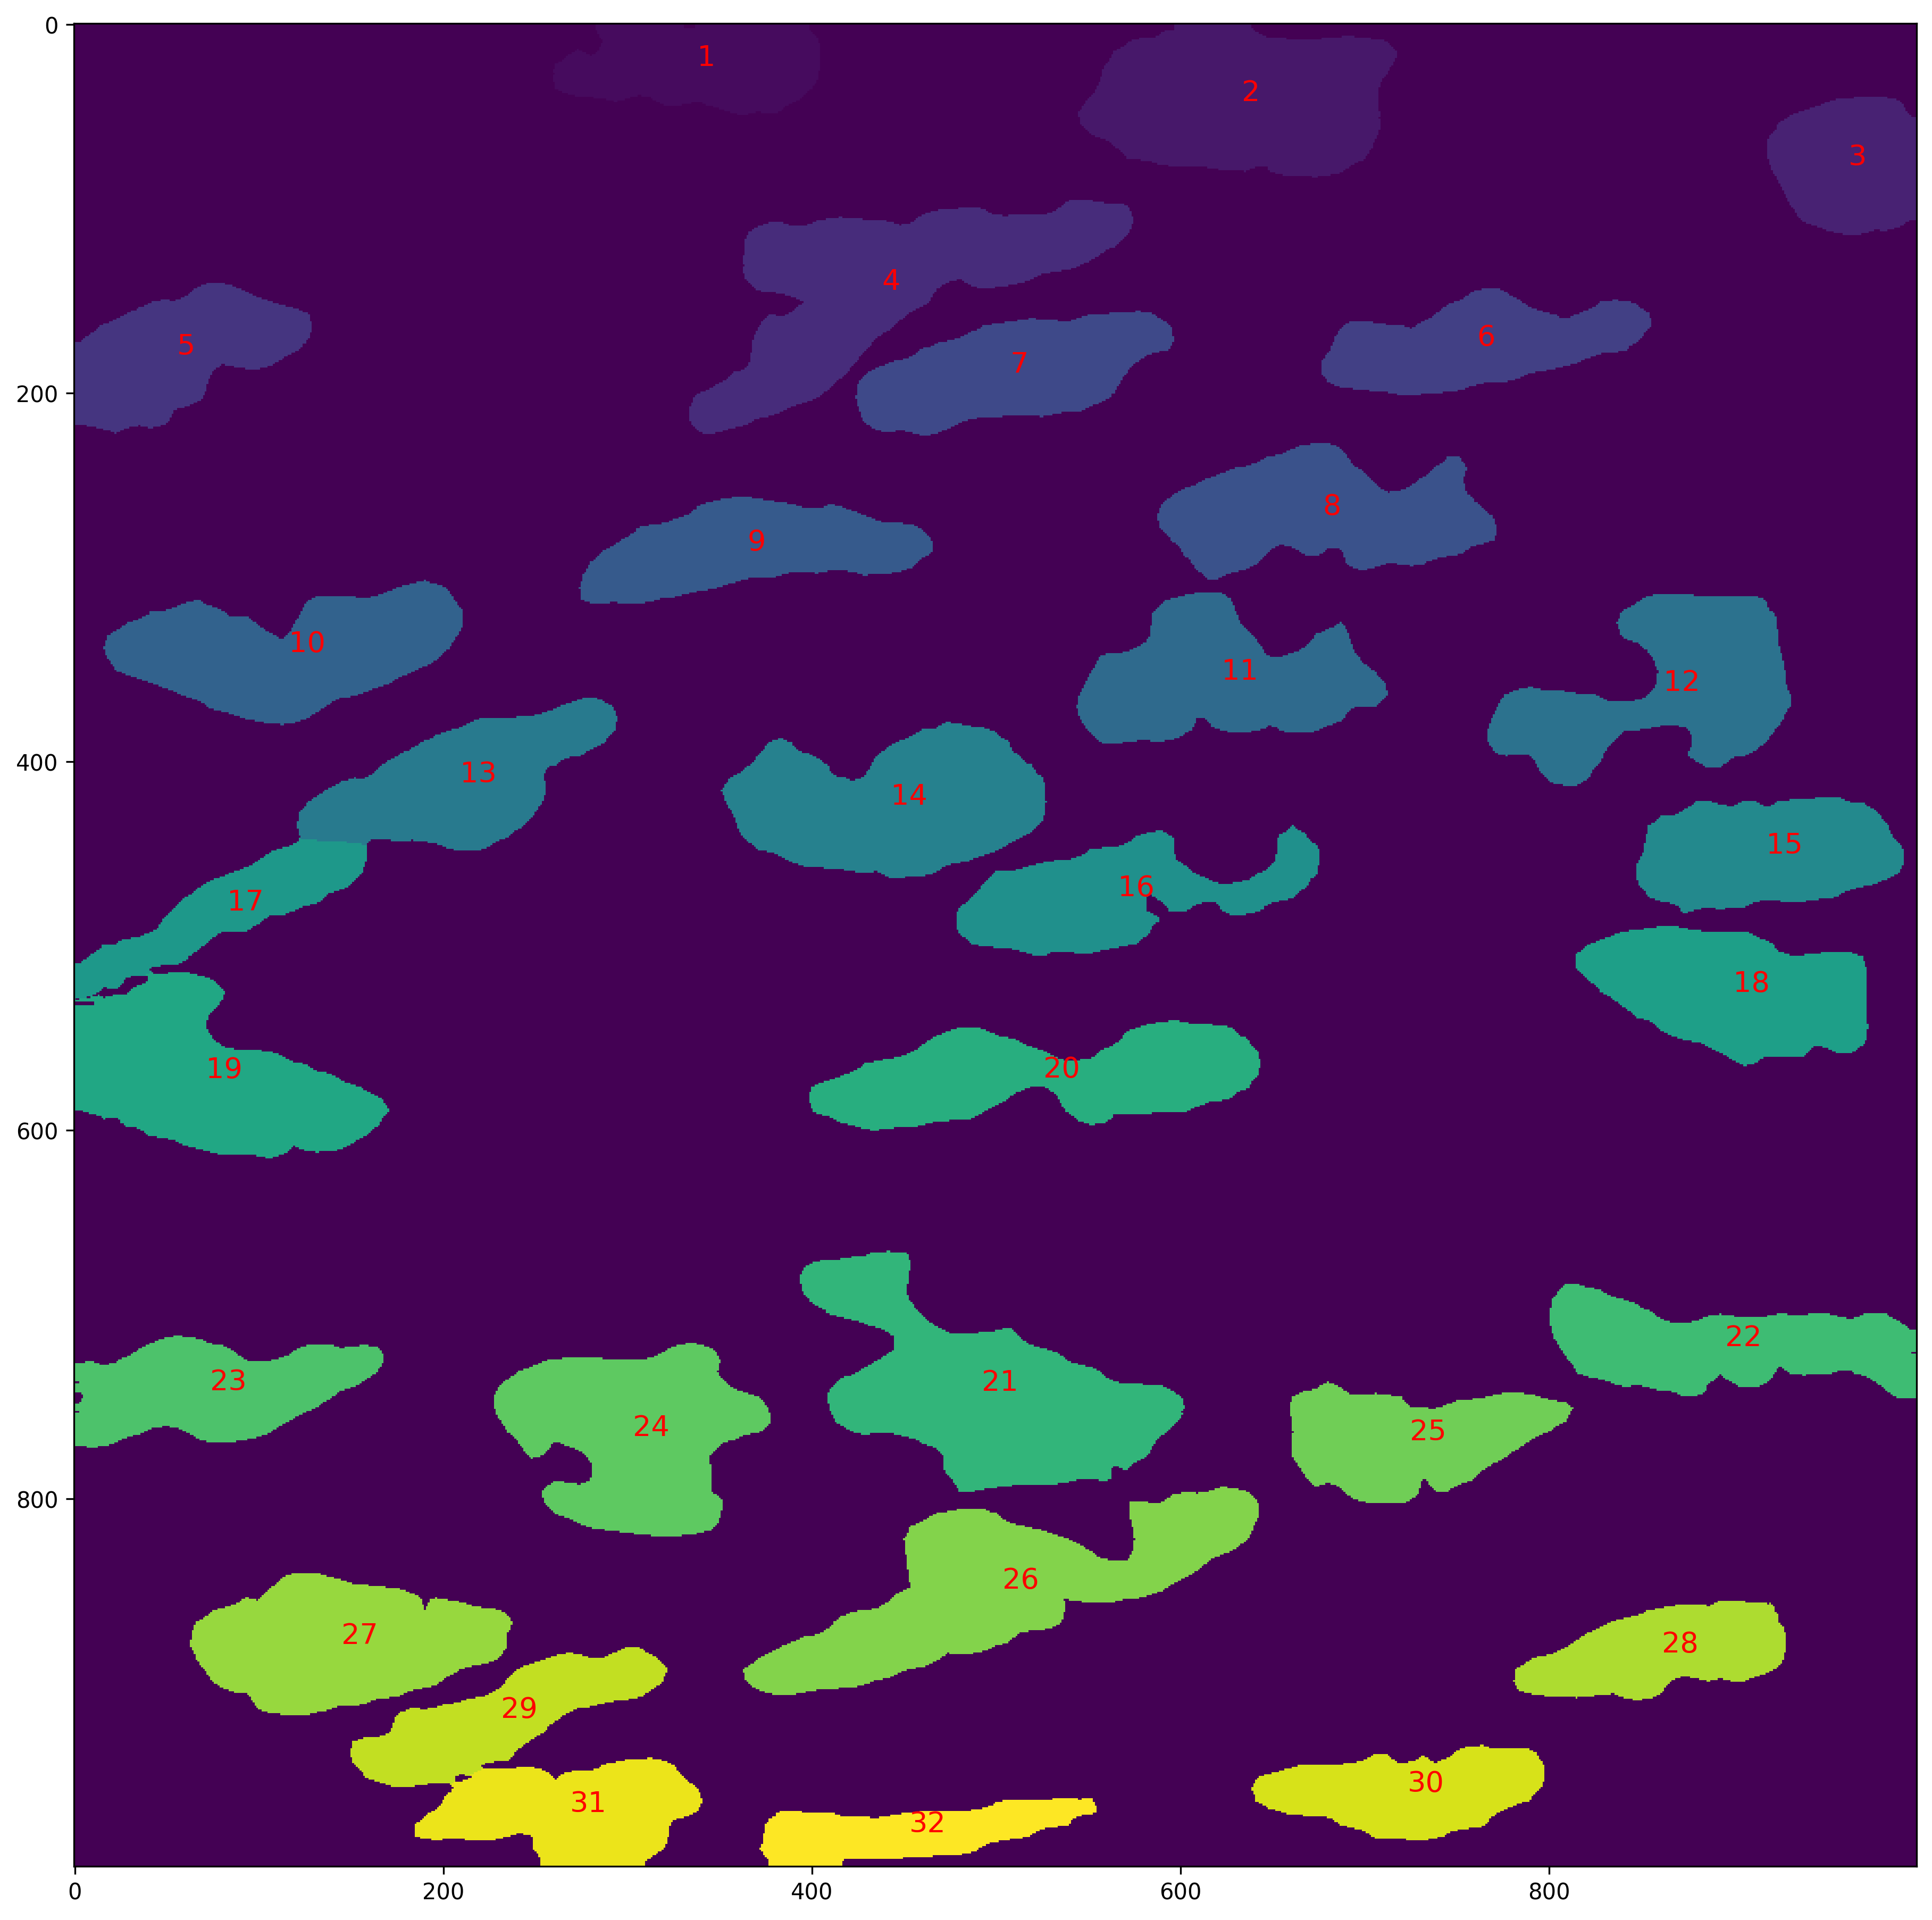

In [29]:
#dataPath = "/content/drive/MyDrive/Northwestern/nucleiDysmorphia/Jocelyn for Madeline_Winter 2023/WT vs KO/controls/"


file = np.load("/content/drive/MyDrive/Northwestern/nucleiDysmorphia/Jocelyn for Madeline_Winter 2023/WT vs KO/controls/weird/2022_1031_12WKMALE_568SRRM2_488pecam_647erg_Arch_60x_2_2022-11-08T09-25-48.945_seg.npy", allow_pickle=True).item()


prop_dict = measure.regionprops_table(file["masks"], properties = ['label', 'centroid'])

df = pd.DataFrame(prop_dict, columns= ['label', 'centroid-0', 'centroid-1'])

fig, ax = plt.subplots(figsize=(36,15))
ax.imshow(file["masks"])
for i in range(len(df)):
        ax.text(df['centroid-1'][i], df['centroid-0'][i], df['label'][i], fontsize=13, color = 'red')
plt.show()